In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/Jupyter Notebook/walmart-sales-prediction/input\Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.rename({"Holiday_Flag":"Is_Holiday"},axis=1,inplace=True)
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Is_Holiday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Is_Holiday    6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
dup=df.duplicated().sum() # checking for duplicates in data
dup

0

In [7]:
# plt.scatter(df["Store"],df["Weekly_Sales"])

In [8]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Is_Holiday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
df.describe()

,Store,Weekly_Sales,Is_Holiday,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
df["Date"]=pd.to_datetime(df["Date"], format = "%d-%m-%Y")
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year
df["Quarter"]=df["Date"].dt.quarter
df.head()

,Store,Date,Weekly_Sales,Is_Holiday,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,1


In [11]:
df['week'] = df['Date'].dt.isocalendar().week
df['day_of_week'] = df['Date'].dt.day_name()
df['month_name'] = df['Date'].dt.month_name()
df.head()

,Store,Date,Weekly_Sales,Is_Holiday,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter,week,day_of_week,month_name
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,1,5,Friday,February
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1,6,Friday,February
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1,7,Friday,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,1,8,Friday,February
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,1,9,Friday,March


In [12]:
def get_season(quarter):
    if quarter==1:
        return 'Winter'
    elif quarter==2:
        return 'Spring'
    elif quarter==3:
         return 'Summer'
    else:
        return 'Autumn'

In [13]:
df['season']=df['Quarter'].apply(get_season)
df.sample(5)

,Store,Date,Weekly_Sales,Is_Holiday,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter,week,day_of_week,month_name,season
3848,27,2012-08-03,1705810.84,0,75.22,3.819,142.191628,8.239,8,2012,3,31,Friday,August,Summer
1286,9,2012-10-26,549731.49,0,69.52,3.506,227.232807,4.954,10,2012,4,43,Friday,October,Autumn
179,2,2010-10-15,1794355.49,0,65.80,2.720,211.471329,8.163,10,2010,4,41,Friday,October,Autumn
202,2,2011-03-25,1766162.05,0,69.42,3.473,214.252157,8.028,3,2011,1,12,Friday,March,Winter
5793,41,2011-07-01,1333347.78,0,67.01,3.597,193.093055,6.901,7,2011,3,26,Friday,July,Summer


In [14]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Fuel_Price'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#correlation is not statistically significant as p-value>0.1

The Pearson Correlation Coefficient is 0.00946378631447513  with a P-value of P = 0.44782874894858105


In [15]:
pearson_coef, p_value = stats.pearsonr(df['Unemployment'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#correlation is statistically significant as p-value<0.001

The Pearson Correlation Coefficient is -0.10617608965795415  with a P-value of P = 1.3448365210234661e-17


In [16]:
pearson_coef, p_value = stats.pearsonr(df['CPI'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#correlation is statistically significant as p-value<0.001

The Pearson Correlation Coefficient is -0.07263416204017621  with a P-value of P = 5.438292612176736e-09


In [17]:
pearson_coef, p_value = stats.pearsonr(df['Temperature'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#correlation is statistically moderately significant as p-value<0.05

The Pearson Correlation Coefficient is -0.06381001317946959  with a P-value of P = 3.0076476258332254e-07


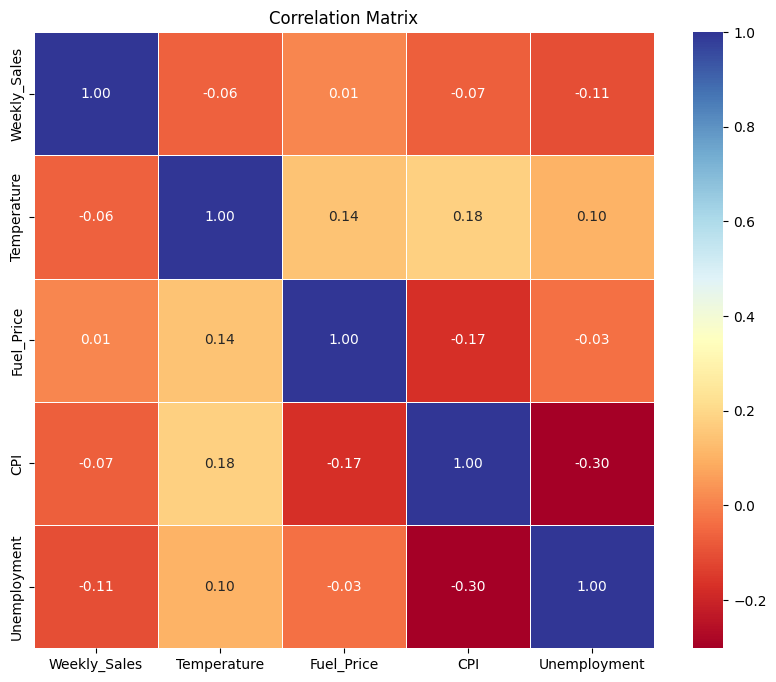

In [18]:
# Correlations with weekly sales
corr_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

#corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()['Weekly_Sales'].sort_values(ascending = False)
#corr = corr.to_frame()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlBu", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [19]:
df_copy = df.copy()
df_copy.drop(['Date', 'Year', 'Quarter', 'Month', 'day_of_week'], axis = 1, inplace = True)
df_copy.dtypes

Store             int64
Weekly_Sales    float64
Is_Holiday        int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
week             UInt32
month_name       object
season           object
dtype: object

In [20]:
df_copy['Store'] = df_copy['Store'].astype('object')
df_copy['Is_Holiday'] = df_copy['Is_Holiday'].astype('object')
df_copy['week'] = df_copy['week'].astype('object')
df_copy.dtypes

Store            object
Weekly_Sales    float64
Is_Holiday       object
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
week             object
month_name       object
season           object
dtype: object

0 Fuel_Price
1 Temperature
2 CPI
3 Unemployment


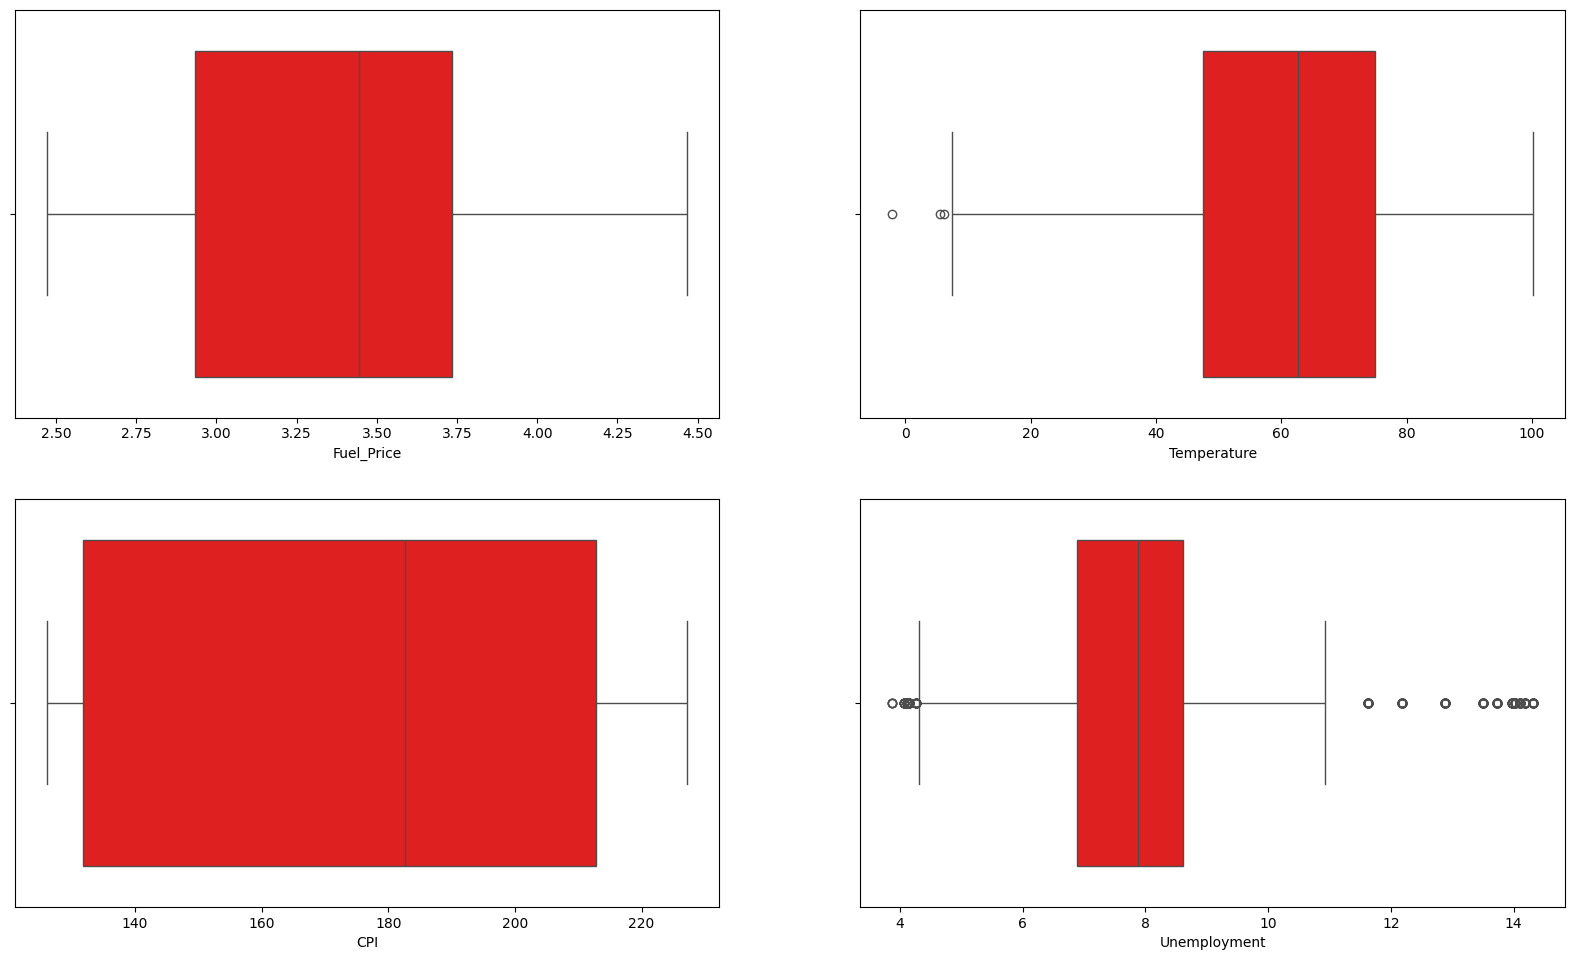

In [21]:
cols = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(df_copy, x = col, color = 'red')
plt.show()

In [22]:
df_copy.drop(df_copy[df_copy['Temperature'] < 7].index, axis = 0, inplace = True)
df_copy.drop(df_copy[df_copy['Unemployment'] < 4.6].index, axis = 0, inplace = True)
df_copy.drop(df_copy[df_copy['Unemployment'] > 10.5].index, axis = 0, inplace = True)

0 Temperature
1 Fuel_Price
2 CPI
3 Unemployment


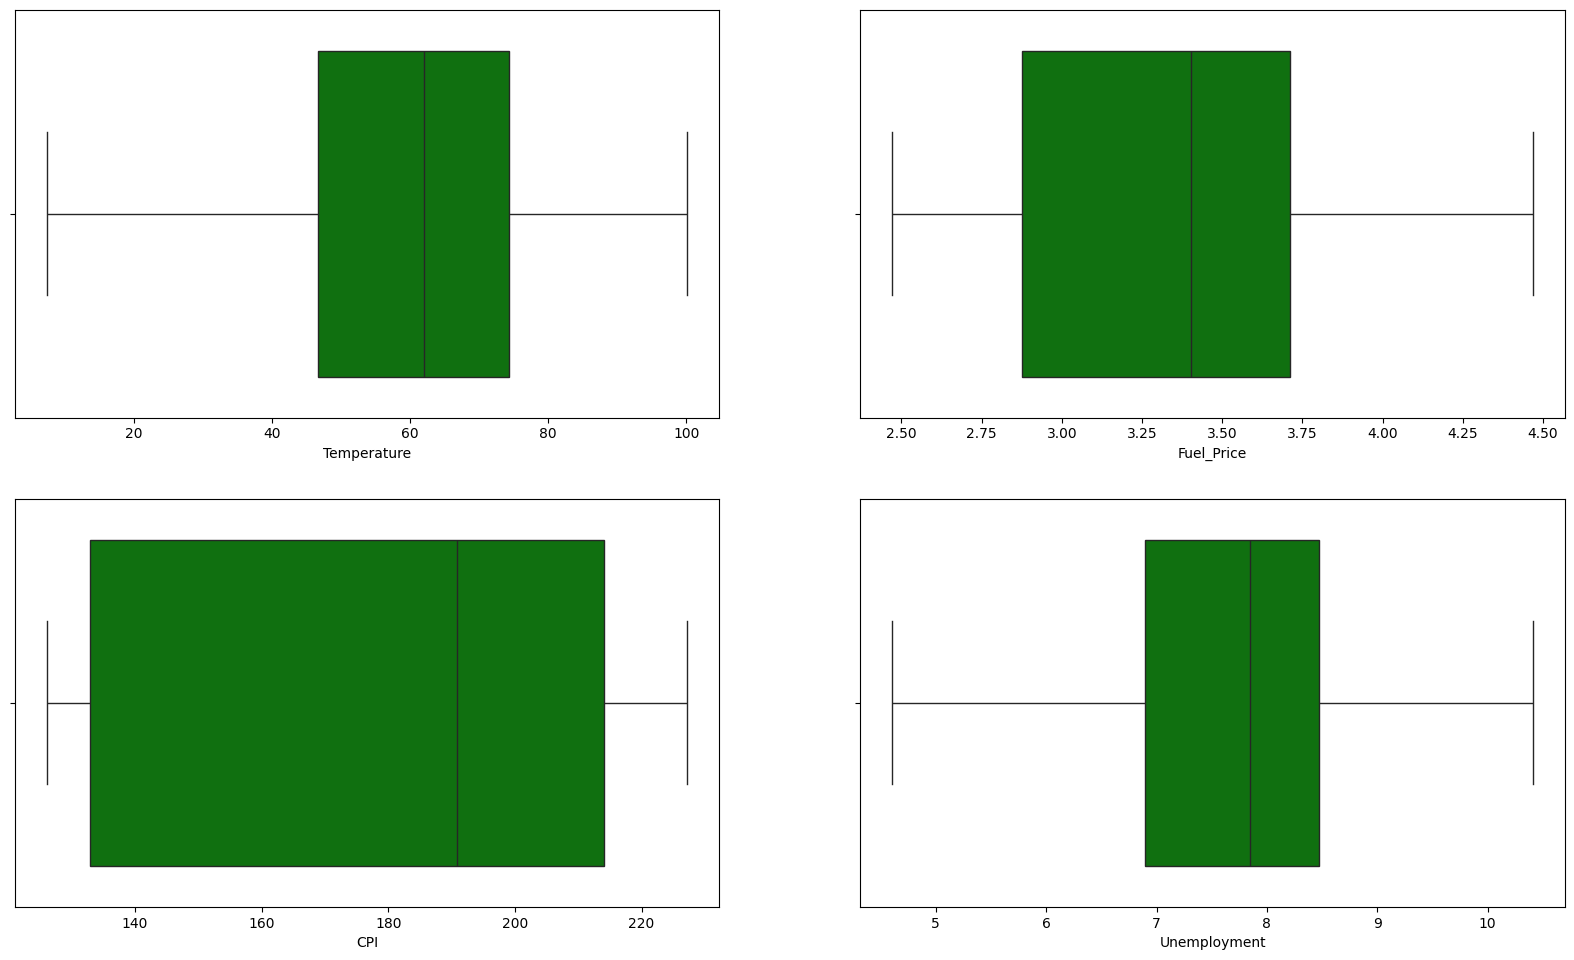

In [23]:
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(20,18))
for i, col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(df_copy, x = col, color = 'g')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=df_copy.drop("Weekly_Sales",axis=1)
Y=df_copy["Weekly_Sales"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42) # test 20%, train 80%

In [26]:
print('Shape of data      : ', X.shape)
print('Shape of train data: ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of data      :  (5777, 9)
Shape of train data:  (4621, 9)
Shape of test data :  (1156, 9)


In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(4621, 9)
(1156, 9)
(4621,)


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [29]:
num_features=df_copy.select_dtypes('number').columns.to_list()
num_features.remove("Weekly_Sales")

cat_features=df_copy.select_dtypes('object').columns.to_list()

print(num_features)
print(cat_features)

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
['Store', 'Is_Holiday', 'week', 'month_name', 'season']


In [30]:
from category_encoders import BinaryEncoder
preprocessor=ColumnTransformer([
                              ('num_features',StandardScaler(),num_features),
                              ('cat_features',BinaryEncoder(),cat_features),
])

# Fitting the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment']),
                                ('cat_features', BinaryEncoder(),
                                 ['Store', 'Is_Holiday', 'week', 'month_name',
                                  'season'])])

In [31]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

In [32]:
def model_evaluation(estimator, Training_Testing, X, Y):

    ''' This function is used to evaluate the model through RMSE and R2'''

    # Y predict of X train or X test
    predict_data = estimator.predict(X)

    print(f'{Training_Testing} Accuracy: \n')
    print(f'-> Root Mean Squared Error: {round(np.sqrt(mean_squared_error(Y, predict_data)), 2)}')
    print(f'-> R-Square score Training: {round(r2_score(Y, predict_data) * 100, 2)} % \n')

In [33]:
def Distribution_Plot(estimator, Training_Testing, X, Y, Title):

    """This function is used to perform some model evaluation using training and testing data \
    by plotting the distribution of the actual and predicted values of the training or testing data."""

    # Y predict of X train or X test
    yhat = estimator.predict(X)

    plt.figure(figsize=(14, 6))
    ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
    ax2 = sns.distplot(yhat, hist = False, color = "r", label = f'Predicted Values ({Training_Testing})', ax = ax1)
    plt.title(Title, size = 18)
    plt.legend()
    plt.show()

In [34]:
 def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score = 'r2', n = 5):

    '''This function is used to find the best set of hyperparameters for the model to optimize its performance'''
    
    
    # Perform grid search
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = param_grid,
                               scoring = score,
                               cv = n)

    # Fit the data
    grid_search.fit(X_train,y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')

    # best estimator
    best_estimator = grid_search.best_estimator_

    return best_estimator

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [36]:
Lr=LinearRegression()
Lr.fit(X_train_transformed,Y_train)
# Training Accuracy
model_evaluation(Lr, 'Training', X_train_transformed, Y_train)

Training Accuracy: 

-> Root Mean Squared Error: 510094.49
-> R-Square score Training: 21.99 % 



In [37]:
# Testing Accuracy
model_evaluation(Lr, 'Testing', X_test_transformed, Y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 502849.67
-> R-Square score Training: 20.45 % 



C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

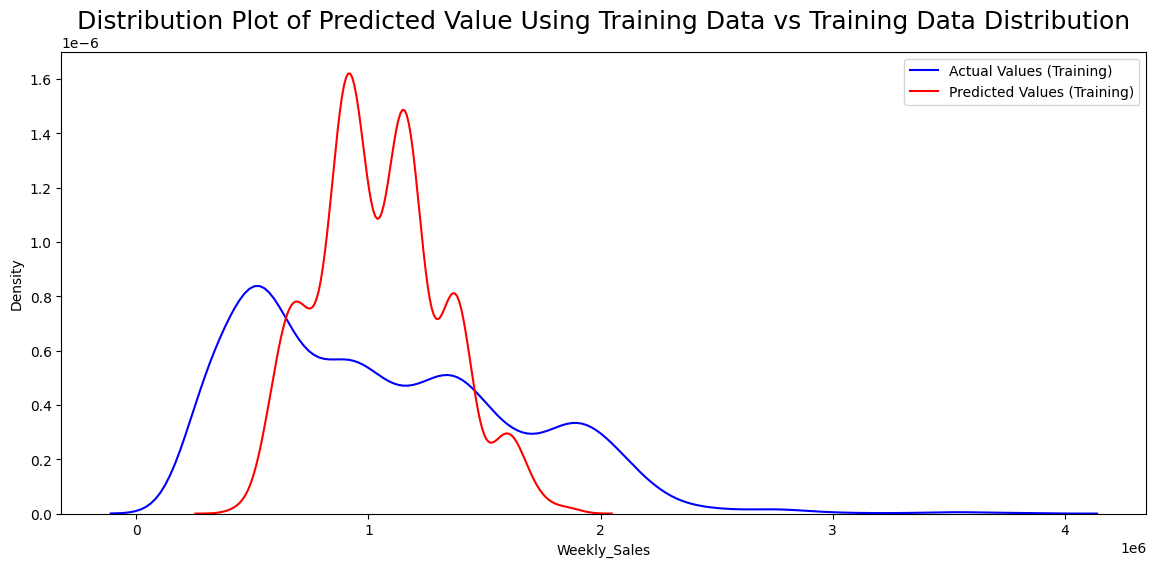

In [38]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Lr, 'Training', X_train_transformed, Y_train, Title)

#Since there are no linear correlations between variables and targets, The model seems to be not doing well in learning from the training dataset,so we need to increase the complexity of this model. let's do Polynomial Features for the data before modeling.

In [39]:
# Polynomial Regression Model
LR_pipe = Pipeline([('poly_feat', PolynomialFeatures()),
                    ('lin_reg', LinearRegression())])

# Define the parameter grid to search
param_grid = {'poly_feat__degree': [2, 3, 4]}

best_estimator = hyperparameter_tunning(LR_pipe, X_train_transformed, Y_train, param_grid, score = 'r2', n = 5)

Best parameters: {'poly_feat__degree': 3} 

Best score: 0.9558728680748947


In [40]:
# Linear Regression Model after tuning
poly_reg = best_estimator
# Training Accuracy Afer tuning
model_evaluation(poly_reg, 'Training', X_train_transformed, Y_train)

Training Accuracy: 

-> Root Mean Squared Error: 71100.71
-> R-Square score Training: 98.48 % 



C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

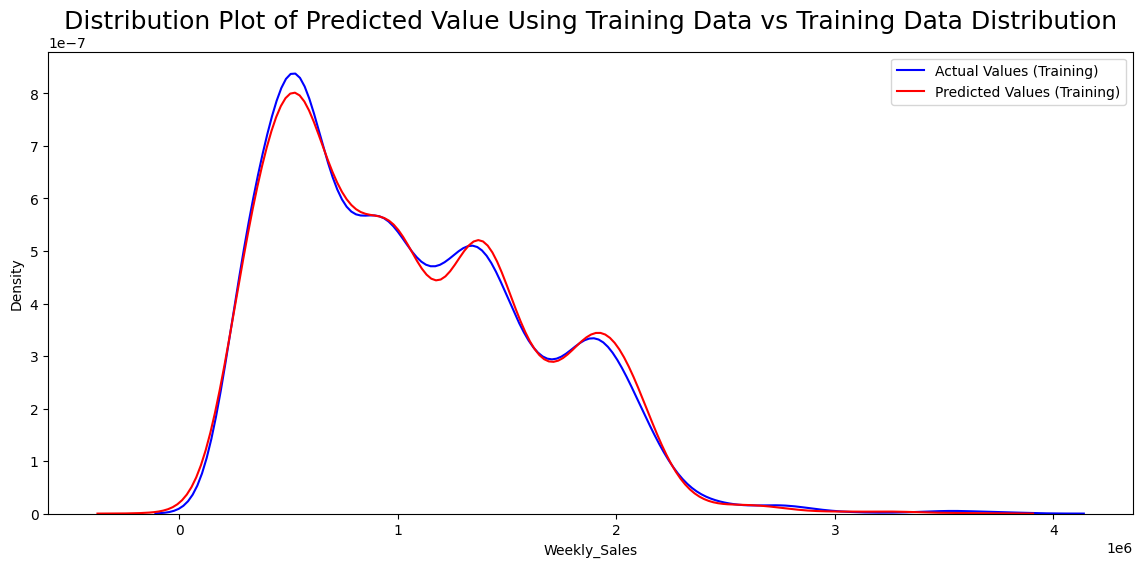

In [41]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(poly_reg, 'Training', X_train_transformed, Y_train, Title)

In [42]:
model_evaluation(poly_reg,'Testing',X_test_transformed,Y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 101476.84
-> R-Square score Training: 96.76 % 



C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

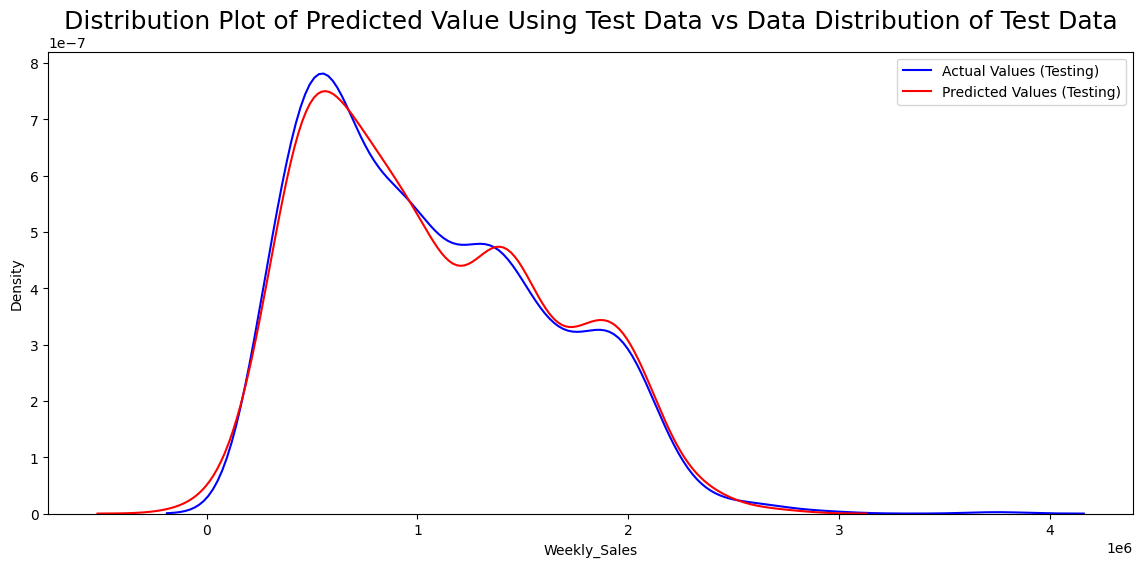

In [43]:
# Figure 3: Plot of predicted value using the test data compared to the actual values of the test data.
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
Distribution_Plot(poly_reg, 'Testing', X_test_transformed, Y_test, Title)
#After testing the polynomial regression model, it became clear that the model had learned sufficiently, as its accuracy was 96.7 %.

In [44]:
#KNN Regressor
Knn_reg=KNeighborsRegressor(n_neighbors=5)
Knn_reg.fit(X_train_transformed,Y_train)
model_evaluation(Knn_reg,'Training',X_train_transformed,Y_train)

Training Accuracy: 

-> Root Mean Squared Error: 342697.93
-> R-Square score Training: 64.79 % 



C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

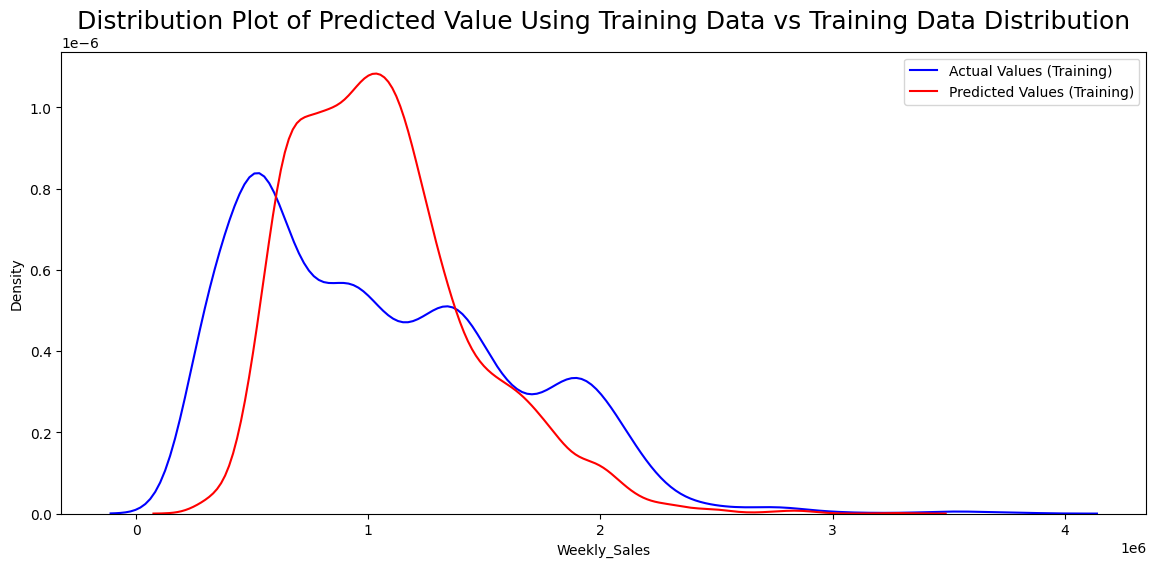

In [45]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Knn_reg, 'Training', X_train_transformed, Y_train, Title)

In [46]:
# Define the parameter grid to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 8, 9, 11, 13]}

best_estimator = hyperparameter_tunning(Knn_reg, X_train_transformed, Y_train, param_grid, score = 'r2', n = 5)

Best_KNN = best_estimator

Best parameters: {'n_neighbors': 8} 

Best score: 0.46601452971630153


In [47]:
model_evaluation(Best_KNN, 'Training', X_train_transformed,Y_train)

Training Accuracy: 

-> Root Mean Squared Error: 360604.97
-> R-Square score Training: 61.01 % 



C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

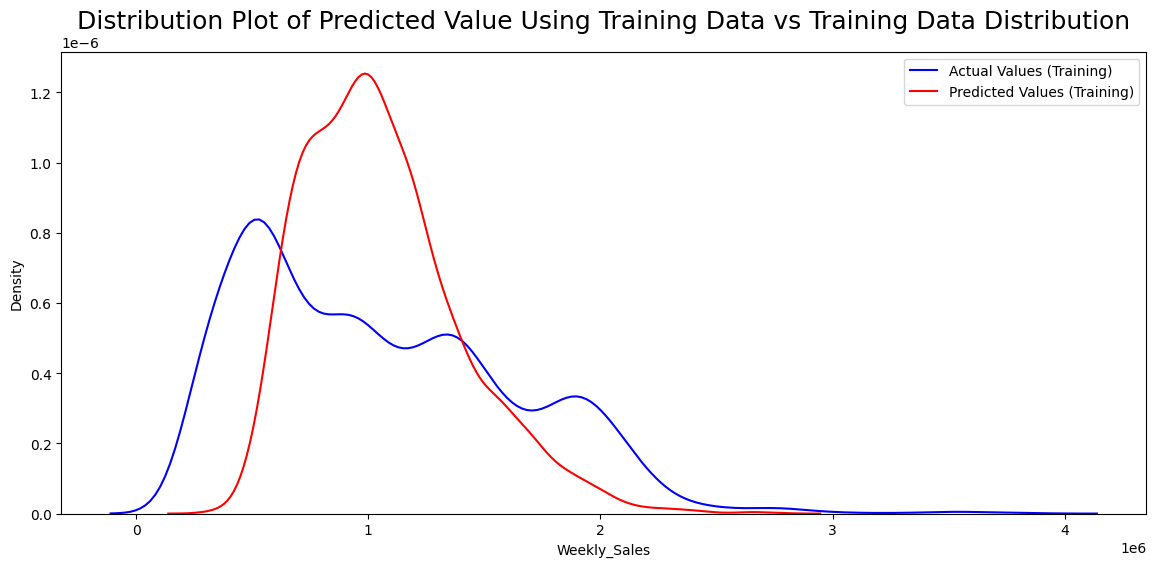

In [48]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Best_KNN, 'Training', X_train_transformed, Y_train, Title)

In [49]:
# Testing Accuracy
model_evaluation(Best_KNN, 'Testing', X_test_transformed, Y_test)

#After testing the KNN Regressor model, it became clear that it is a bad model with an accuracy of 50.25 % in comparison to the above algorithm we used (Linear Regression).

Testing Accuracy: 

-> Root Mean Squared Error: 397436.32
-> R-Square score Training: 50.31 % 



In [50]:
#Decision Tree Regressor
Dt=DecisionTreeRegressor()
Dt.fit(X_train_transformed,Y_train)
model_evaluation(Dt,'Trainig',X_train_transformed,Y_train) # overfitting

Trainig Accuracy: 

-> Root Mean Squared Error: 0.0
-> R-Square score Training: 100.0 % 



C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

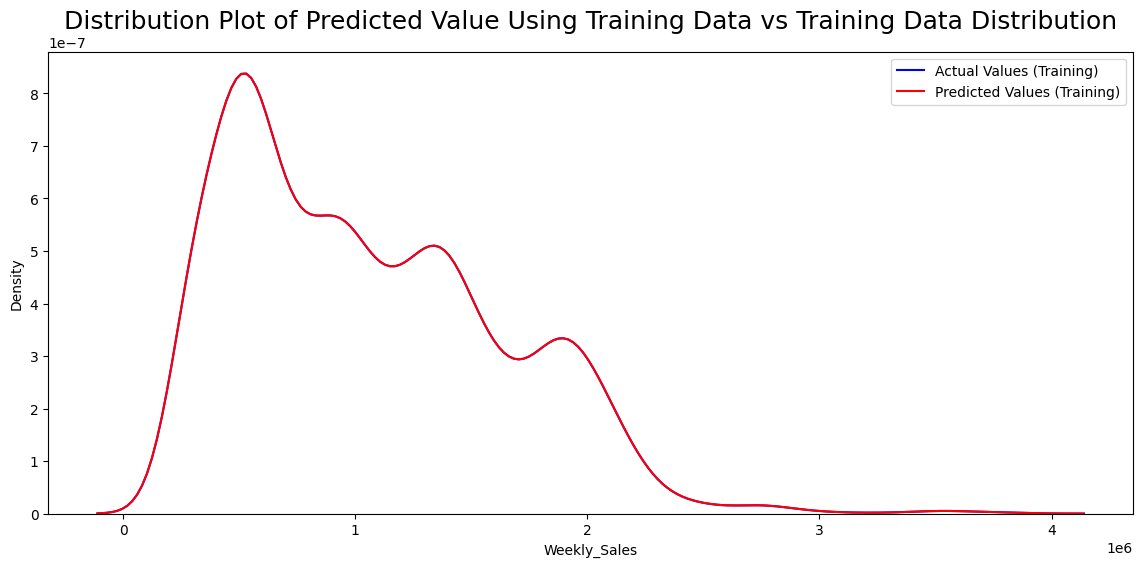

In [51]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Dt, 'Training', X_train_transformed, Y_train, Title)

In [52]:
#model_evaluation(Dt,'Trainig',X_test_transformed,Y_test)

In [53]:
# Line added
model_evaluation(Dt,'Testing',X_test_transformed,Y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 155040.25
-> R-Square score Training: 92.44 % 



C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

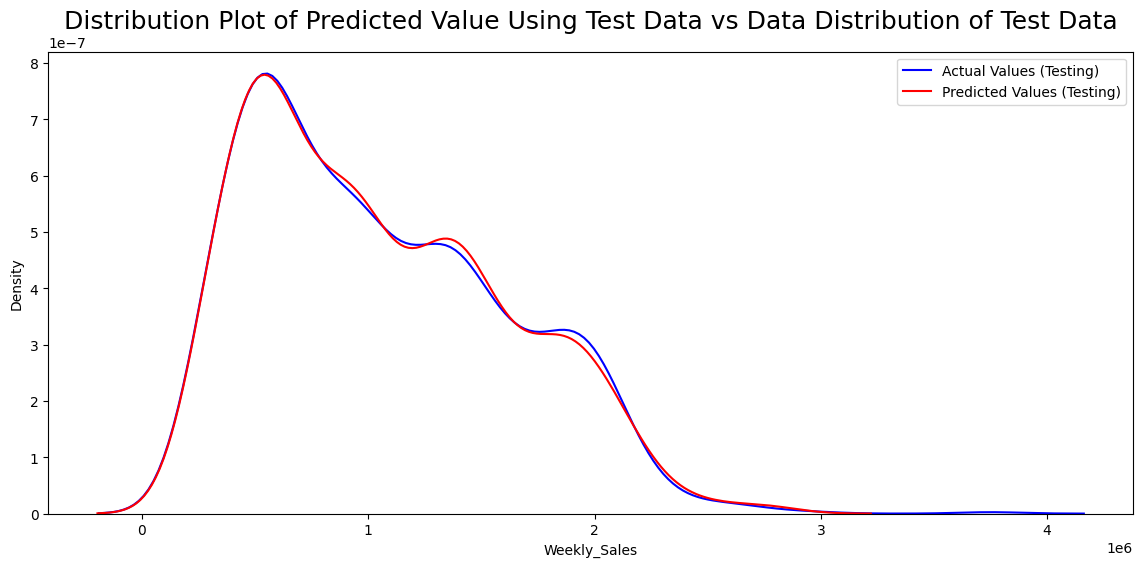

In [54]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
Distribution_Plot(Dt, 'Testing', X_test_transformed, Y_test, Title) # recheck

In [55]:
param_grid={'max_depth':np.arange(2,15),
            'min_samples_split': [10, 20, 30, 40, 50, 100, 200, 300]}

best_estimator = hyperparameter_tunning(Dt, X_train_transformed, Y_train, param_grid, score = 'r2', n = 5)

Best_Tree = best_estimator

Best parameters: {'max_depth': 10, 'min_samples_split': 40} 

Best score: 0.9190645774291445


In [56]:
model_evaluation(Best_Tree,'Training',X_test_transformed,Y_test)

Training Accuracy: 

-> Root Mean Squared Error: 147938.8
-> R-Square score Training: 93.11 % 



C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

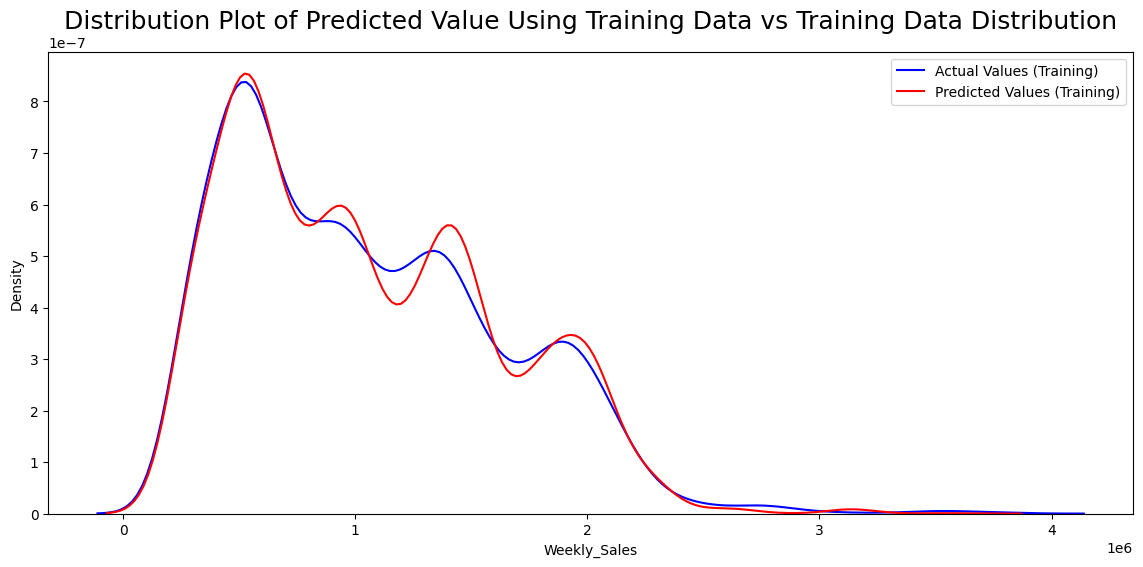

In [57]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Best_Tree, 'Training', X_train_transformed, Y_train, Title)

In [58]:
#Testing Accuracy
model_evaluation(Best_Tree, 'Testing', X_test_transformed, Y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 147938.8
-> R-Square score Training: 93.11 % 



C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

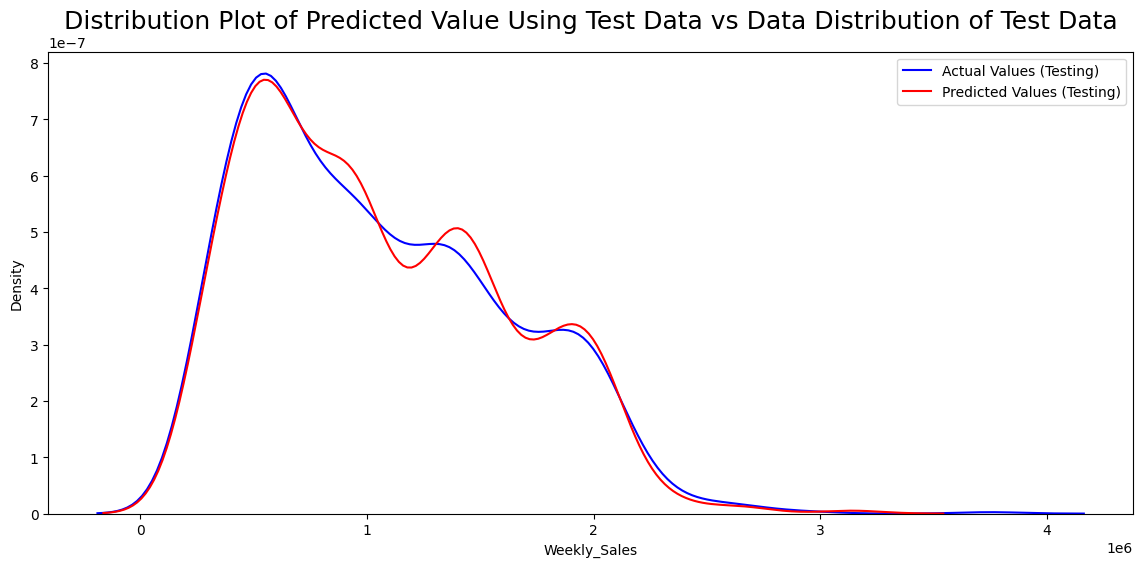

In [59]:
# Figure 3: Plot of predicted value using the test data compared to the actual values of the test data.
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
Distribution_Plot(Best_Tree, 'Testing', X_test_transformed, Y_test, Title)

In [60]:
#RandomForest Regressor
rf = RandomForestRegressor()
rf.fit(X_train_transformed,Y_train)
# Training Accuracy
model_evaluation(rf, 'Training', X_train_transformed, Y_train)

Training Accuracy: 

-> Root Mean Squared Error: 47639.89
-> R-Square score Training: 99.32 % 



C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\asus\AppData\Local\Temp\ipykernel_2112\1836728355.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

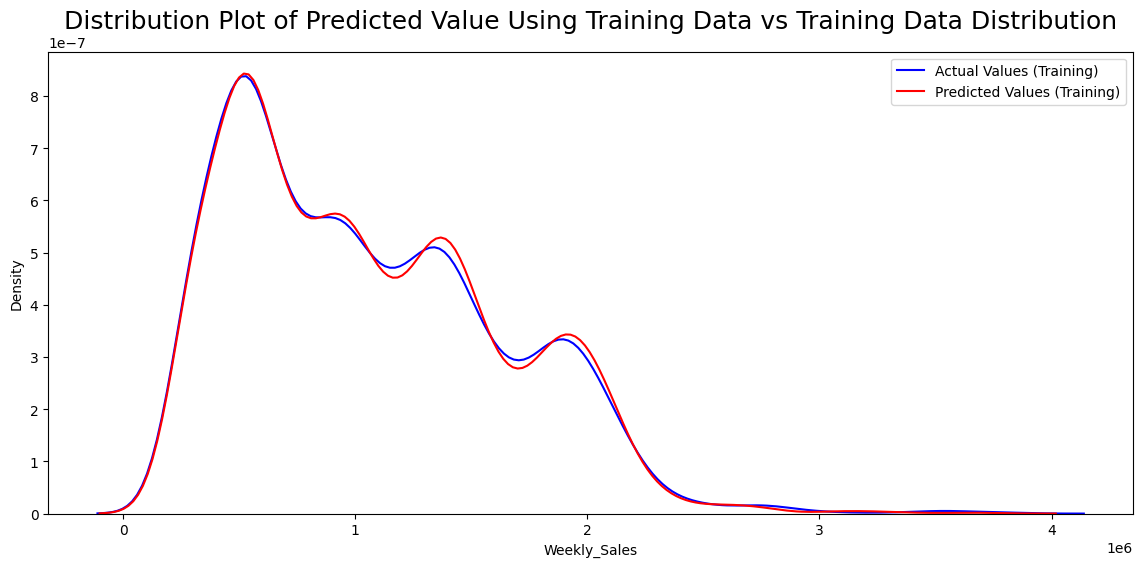

In [61]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(rf, 'Training', X_train_transformed, Y_train, Title)

In [62]:
# Testing Accuracy
model_evaluation(rf, 'Testing', X_test_transformed, Y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 120713.27
-> R-Square score Training: 95.42 % 



In [63]:
'''
Conclusions-----
a.Sales tend to be higher in Summer.
b.The rate of sales on holidays is higher than on other days.
c.There is a high variance in weekly sales from one store to another.
d.Sales are affected by the unemployment rate, so the higher the unemployment rate, the lower the sales.
Comparing these four models, we conclude that The Linear Regression Model is the best model with an accuracy of 96.84 % to be able to predict weekly sales from our dataset.'''

'\nConclusions-----\na.Sales tend to be higher in Summer.\nb.The rate of sales on holidays is higher than on other days.\nc.There is a high variance in weekly sales from one store to another.\nd.Sales are affected by the unemployment rate, so the higher the unemployment rate, the lower the sales.\nComparing these four models, we conclude that The Linear Regression Model is the best model with an accuracy of 96.84 % to be able to predict weekly sales from our dataset.'